In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [4]:
from sklearn.model_selection import train_test_split
(train, test) = train_test_split(data, test_size = 0.3)
train_output = train['class']
train_input = train[[x for x in train if 'class' not in x]]

test_output = test['class']
test_input = test[[x for x in test if 'class' not in x]]

train_input.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1570,2,0,4,0,5,1,1,0,4,1,...,0,7,7,0,2,1,0,2,0,1
3266,2,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
4509,5,0,9,0,2,1,0,0,7,0,...,1,0,0,0,2,1,2,1,4,0
6785,5,2,4,0,7,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
7217,3,2,3,0,5,1,1,0,2,0,...,1,7,7,0,2,2,4,7,2,1


In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_input, train_output)

y = lr.predict(test_input)

In [6]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_output, y)

print('Accuracy of Logistic Regression model is %f' %acc)

Accuracy of Logistic Regression model is 0.950779


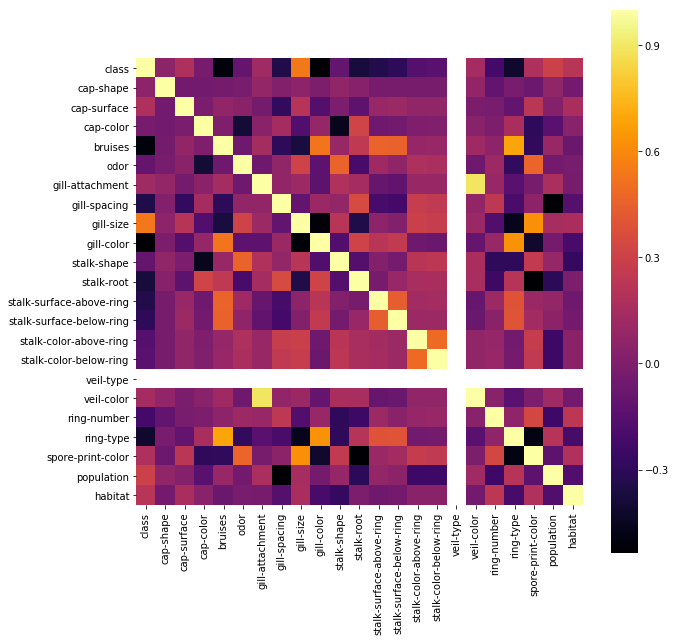

In [7]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), cmap = 'inferno',square=True)